# Ford GoBike
<br>
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#gathering">Data Gathering</a></li>
<li><a href="#assessing">Data Assessing</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#insights_visualization">Insights and Visualization</a>
   <ul><a href="#Univariate Plots">Univariate Plots</a></ul>
   <ul><a href="#Bivariate Plots">Bivariate Plots</a></ul>
   <ul><a href="#Multivariate Plots">Multivariate Plots</a></ul></li>
</ul>

<a id='intro'></a>
### Introduction
This data set includes information about individual rides made in a bike-sharing system in 2017(June-December). Bay Wheels is the first regional and large-scale bicycle sharing system deployed in California and on the West Coast of the United States.

In [1]:
# Let's start with importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
% matplotlib inline

<a id='gathering'></a>
### Data Gathering

In [2]:
# reading dataframe from csv file
ford=pd.read_csv('fordgo.csv')

In [3]:
# printing first few rows to confirm whether dataset is imported successfully
ford.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber


<a id='assessing'></a>
### Data Assessing

In [4]:
# visually assesing data to see if there are any quality or tidiness issues
ford

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type
0,80110,2017-12-31 16:57:39.6540,2018-01-01 15:12:50.2450,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer
1,78800,2017-12-31 15:56:34.8420,2018-01-01 13:49:55.6170,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer
2,45768,2017-12-31 22:45:48.4110,2018-01-01 11:28:36.8830,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer
3,62172,2017-12-31 17:31:10.6360,2018-01-01 10:47:23.5310,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer
4,43603,2017-12-31 14:23:14.0010,2018-01-01 02:29:57.5710,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber
5,9226,2017-12-31 22:51:00.9180,2018-01-01 01:24:47.1660,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,30,San Francisco Caltrain (Townsend St at 4th St),37.776598,-122.395282,1487,Customer
6,4507,2017-12-31 23:49:28.4220,2018-01-01 01:04:35.6190,259,Addison St at Fourth St,37.866249,-122.299371,259,Addison St at Fourth St,37.866249,-122.299371,3539,Customer
7,4334,2017-12-31 23:46:37.1960,2018-01-01 00:58:51.2110,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,1503,Customer
8,4150,2017-12-31 23:37:07.5480,2018-01-01 00:46:18.3080,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,3125,Customer
9,4238,2017-12-31 23:35:38.1450,2018-01-01 00:46:17.0530,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,20,Mechanics Monument Plaza (Market St at Bush St),37.791300,-122.399051,2543,Customer


In [5]:
# checking the shape of the dataframe
ford.shape

(519700, 13)

In [6]:
# checking the datatypes of columns and if there is any null value present in the dataframe
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 13 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null object
end_time                   519700 non-null object
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
dtypes: float64(4), int64(4), object(5)
memory usage: 51.5+ MB


In [7]:
ford.describe()

,duration_sec,start_station_id,start_station_latitude,start_station_longitude,end_station_id,end_station_latitude,end_station_longitude,bike_id
count,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000,519700.000000
mean,1099.009521,95.034245,37.771653,-122.363927,92.184041,37.771844,-122.363236,1672.533079
std,3444.146451,86.083078,0.086305,0.105573,84.969491,0.086224,0.105122,971.356959
min,61.000000,3.000000,37.317298,-122.444293,3.000000,37.317298,-122.444293,10.000000
25%,382.000000,24.000000,37.773492,-122.411726,23.000000,37.774520,-122.410345,787.000000
50%,596.000000,67.000000,37.783521,-122.398870,66.000000,37.783830,-122.398525,1728.500000
75%,938.000000,139.000000,37.795392,-122.391034,134.000000,37.795392,-122.391034,2520.000000
max,86369.000000,340.000000,37.880222,-121.874119,340.000000,37.880222,-121.874119,3733.000000


In [8]:
# checking description of object datatype. 
# this is mostly helpful for checking number of unique values in the object datatype and highest frequency of element. 
ford.describe(include='object')

,start_time,end_time,start_station_name,end_station_name,user_type
count,519700,519700,519700,519700,519700
unique,519688,519681,272,272,2
top,2017-11-13 20:23:02.3100,2017-09-28 18:47:47.3650,San Francisco Ferry Building (Harry Bridges Pl...,San Francisco Caltrain (Townsend St at 4th St),Subscriber
freq,2,2,15187,17378,409230


In [9]:
# checking how many unique bike_id are there in whole dataset
ford.bike_id.nunique()

3673

In [10]:
# checking how many bikes are there in whole dataset
ford.user_type.value_counts()

Subscriber    409230
Customer      110470
Name: user_type, dtype: int64

In [11]:
# check how much memory each element is using
ford.memory_usage()

Index                           80
duration_sec               4157600
start_time                 4157600
end_time                   4157600
start_station_id           4157600
start_station_name         4157600
start_station_latitude     4157600
start_station_longitude    4157600
end_station_id             4157600
end_station_name           4157600
end_station_latitude       4157600
end_station_longitude      4157600
bike_id                    4157600
user_type                  4157600
dtype: int64

##### Assessment summary
- start_time, end_time should be in datetime format
- station_id, end_station_id and bike_id are in int format. they can be in string fromat as we are not performing mathematical operation on them.
- user_type column is in object type. We can convert it to category as it contains only 2 values. it will consume less memory.
- we can extract weekday and month from start_time column to ease our further operations

<a id='cleaning'></a>
### Data Cleaning

###### Quality issue 1
###### Define <br>
convert start_time and end_time into datetime datatype and create seperate column for month and weekday


###### Code

In [12]:
# converting start_time and end_time to datetime format
ford.start_time = pd.to_datetime(ford.start_time)
ford.end_time = pd.to_datetime(ford.end_time)

In [13]:
## we will store month and weekday_name from start_time in seperate column to ease our operations related to dat_time
ford['month']=ford.start_time.dt.strftime('%b').astype('category')
ford['weekday']=ford.start_time.dt.weekday_name.astype('category')

##### Test

In [14]:
# checking whether start_time and end_time have converted in datetime format or not
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null int64
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null int64
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null int64
user_type                  519700 non-null object
month                      519700 non-null category
weekday                    519700 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(4), object(3)
memory usage: 52.5+ MB


###### Quality issue 2
###### Define <br>
convert station_id, end_station_id and bike_id into string datatype

##### Code

In [15]:
# converting start_station_id, end_station_id and bike_id into string datatype
ford= ford.astype({'start_station_id':'object','end_station_id':'object','bike_id':'object'})

##### Test

In [16]:
# checking whether start_station_id, end_station_id and bike_id into string datatype are in string(object) format or not
ford.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 519700 entries, 0 to 519699
Data columns (total 15 columns):
duration_sec               519700 non-null int64
start_time                 519700 non-null datetime64[ns]
end_time                   519700 non-null datetime64[ns]
start_station_id           519700 non-null object
start_station_name         519700 non-null object
start_station_latitude     519700 non-null float64
start_station_longitude    519700 non-null float64
end_station_id             519700 non-null object
end_station_name           519700 non-null object
end_station_latitude       519700 non-null float64
end_station_longitude      519700 non-null float64
bike_id                    519700 non-null object
user_type                  519700 non-null object
month                      519700 non-null category
weekday                    519700 non-null category
dtypes: category(2), datetime64[ns](2), float64(4), int64(1), object(6)
memory usage: 52.5+ MB


###### Quality issue 3
###### Define <br>
convert datatype of user_type column to category

##### code

In [17]:
# converting station_id, end_station_id and bike_id into string datatype
ford['user_type']=ford.user_type.astype('category')

##### Test

In [18]:
ford.user_type.dtype

CategoricalDtype(categories=['Customer', 'Subscriber'], ordered=False)

In [19]:
ford.memory_usage()

Index                           80
duration_sec               4157600
start_time                 4157600
end_time                   4157600
start_station_id           4157600
start_station_name         4157600
start_station_latitude     4157600
start_station_longitude    4157600
end_station_id             4157600
end_station_name           4157600
end_station_latitude       4157600
end_station_longitude      4157600
bike_id                    4157600
user_type                   519796
month                       520076
weekday                     520076
dtype: int64

### What is the structure of your dataset?
There are 519,700 trip records in the dataset with 15 features (duration_sec, start_time, end_time, start_station_id, start_station_name, start_station_latitude, start_station_longitude, end_station_id, end_station_name, end_station_latitude ,end_station_longitude, bike_id, user_type, month, weekday). 5 variables are numeric in nature, 6 variables are object type. 2 variables are of datetime format and 3 is category type.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out how trip duration is dependent on other features such as: start station, end station, user type, from the dataset. We can use dates from start time and end time to predict when bikes will be in high demand.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

the start time  and end time information will be highly useful. along with this user_type will be helpful to analyse and investigate the dataset

<a id="insights_visualization"> </a>
### Insights and  Visualization

In [20]:
# creating another variable to store the cleaned dataset
df=ford.copy()

In [21]:
df.head()

,duration_sec,start_time,end_time,start_station_id,start_station_name,start_station_latitude,start_station_longitude,end_station_id,end_station_name,end_station_latitude,end_station_longitude,bike_id,user_type,month,weekday
0,80110,2017-12-31 16:57:39.654,2018-01-01 15:12:50.245,74,Laguna St at Hayes St,37.776435,-122.426244,43,San Francisco Public Library (Grove St at Hyde...,37.778768,-122.415929,96,Customer,Dec,Sunday
1,78800,2017-12-31 15:56:34.842,2018-01-01 13:49:55.617,284,Yerba Buena Center for the Arts (Howard St at ...,37.784872,-122.400876,96,Dolores St at 15th St,37.766210,-122.426614,88,Customer,Dec,Sunday
2,45768,2017-12-31 22:45:48.411,2018-01-01 11:28:36.883,245,Downtown Berkeley BART,37.870348,-122.267764,245,Downtown Berkeley BART,37.870348,-122.267764,1094,Customer,Dec,Sunday
3,62172,2017-12-31 17:31:10.636,2018-01-01 10:47:23.531,60,8th St at Ringold St,37.774520,-122.409449,5,Powell St BART Station (Market St at 5th St),37.783899,-122.408445,2831,Customer,Dec,Sunday
4,43603,2017-12-31 14:23:14.001,2018-01-01 02:29:57.571,239,Bancroft Way at Telegraph Ave,37.868813,-122.258764,247,Fulton St at Bancroft Way,37.867789,-122.265896,3167,Subscriber,Dec,Sunday


<a id="Univariate Plots"> </a>
#### Univariate Plots
##### Now we will plot to see distribution of number of trips over trip_duration , month , weekday, user_type

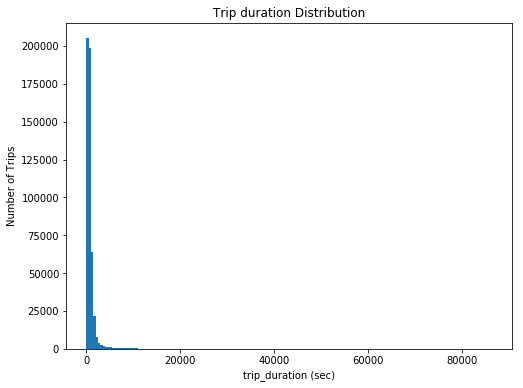

In [22]:
# ignore warnings in visualization part
import warnings
warnings.filterwarnings('ignore')
# start with a standard-scaled plot
binsize = 500
bins = np.arange(0, df['duration_sec'].max()+binsize, binsize)
plt.rcParams['figure.figsize'] = 8, 6
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.title('Trip duration Distribution')
plt.xlabel('trip_duration (sec)')
plt.ylabel('Number of Trips')
plt.show()

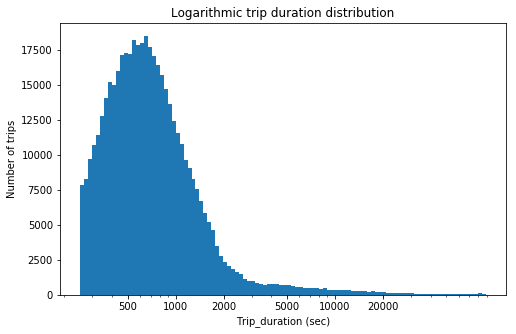

In [23]:
# there's a long tail in the distribution, so let's put it on a log scale instead
log_binsize = 0.025
bins = 10 ** np.arange(2.4, np.log10(df['duration_sec'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5])
plt.hist(data = df, x = 'duration_sec', bins = bins)
plt.xscale('log')
plt.xticks([500, 1e3, 2e3, 5e3, 1e4, 2e4], [500, '1000', '2000', '5000', '10000', '20000'])
plt.title('Logarithmic trip duration distribution')
plt.xlabel('Trip_duration (sec)')
plt.ylabel('Number of trips')
plt.show()

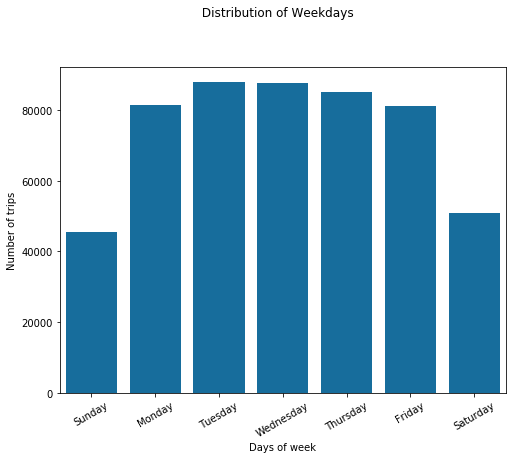

In [24]:
weekday_order=['Sunday','Monday','Tuesday','Wednesday','Thursday','Friday','Saturday']
zero_color = sns.color_palette('colorblind')[0]
sns.countplot(data=df, x='weekday', order=weekday_order , color=zero_color);
plt.suptitle(" Distribution of Weekdays", y=1.02)
plt.xticks(rotation=30);
plt.xlabel('Days of week');
plt.ylabel('Number of trips');

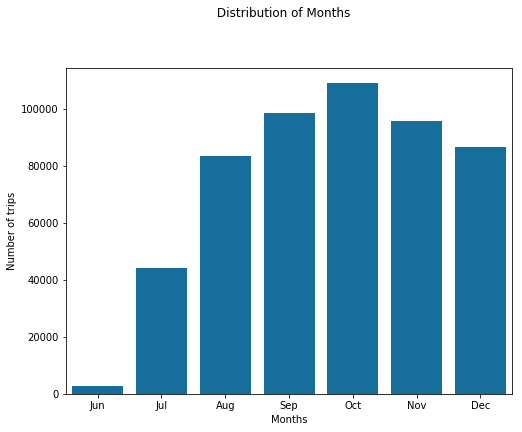

In [25]:
month_order=['Jun', 'Jul', 'Aug','Sep','Oct','Nov','Dec']
sns.countplot(data=df, x='month', color=zero_color, order=month_order);
plt.suptitle(" Distribution of Months", y=1.02)
plt.xlabel('Months');
plt.ylabel('Number of trips');

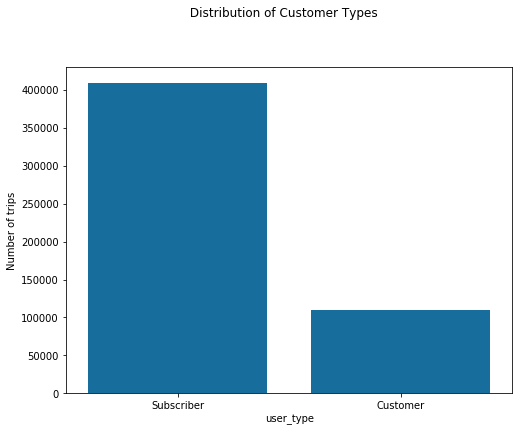

In [26]:
base_color = sns.color_palette()[0]
cat_order = df['user_type'].value_counts().index
plt.suptitle(" Distribution of Customer Types", y=1.02)
sns.countplot(data = df, x = 'user_type', color = zero_color, order = cat_order)
plt.ylabel('Number of trips');

The distribution of trips over duration_sec, we can clearly see that more than 75% rides are below 1000 second. From second plot(distribution of trips over weekday) we can clearly observe that on weekends there is less demand of rides. From third plot (distribution of trips over month) we can analyse that in septeber-November people tend to ride more. From fourth plot (distribution of trips over user_type) it is clear that subscribers tend to ride more than (customers)casual riders.

<a id="Bivariate Plots"></a>
#### Bivariate plots
##### Now we will look at relation between distribution of trip_duration and   user_type , month , weekday,

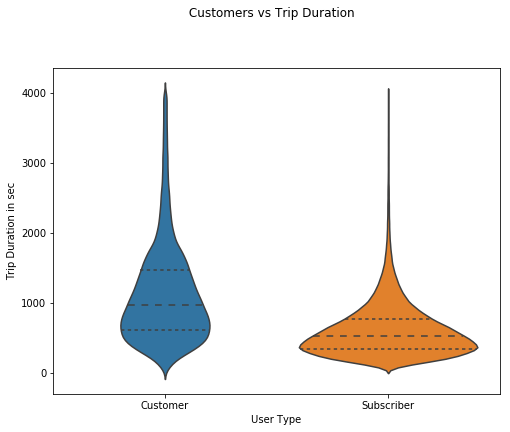

In [27]:
sns.violinplot(data = df[df.duration_sec < 4000], x = 'user_type', y = 'duration_sec', inner='quartile')
plt.suptitle(" Customers vs Trip Duration", y=1.02)
plt.xlabel('User Type');
plt.ylabel('Trip Duration in sec');

From the distribution of trip duration it seems that like subscribers use for fix duration compared to customers who vary more and generally rented the bikes for longer.

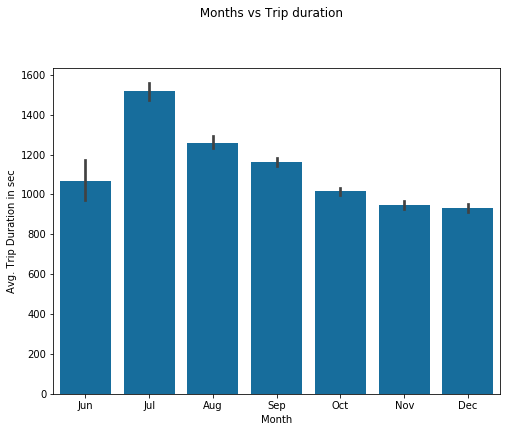

In [28]:
sns.barplot(data=df, x='month', y='duration_sec', color=zero_color, order=month_order);
plt.suptitle(" Months vs Trip duration", y=1.02)
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in sec');

From the above plot it is clear that people ride longer during july and august. It must be related to weather conditions.

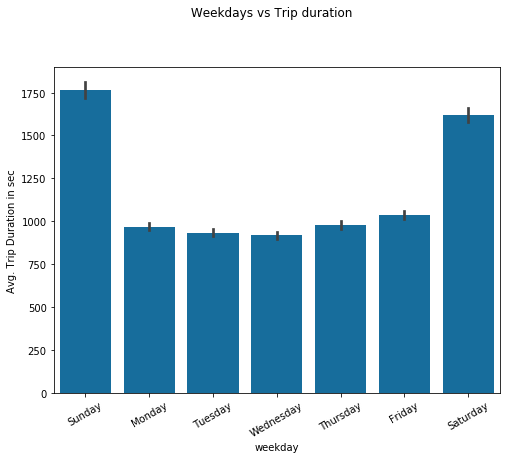

In [29]:
sns.barplot(data=df, x='weekday', y='duration_sec', color=zero_color, order=weekday_order);
plt.suptitle(" Weekdays vs Trip duration", y=1.02)
plt.xlabel('weekday');
plt.xticks(rotation=30);
plt.ylabel('Avg. Trip Duration in sec');

From above plot it is evident though the number of trips are lower, they tend to ride for longer duration.

<a id="Multivariate Plots"> </a>
#### Multivariate plots
##### Now we will look at relation between distribution of trip_duration and   user_type , month , weekday,

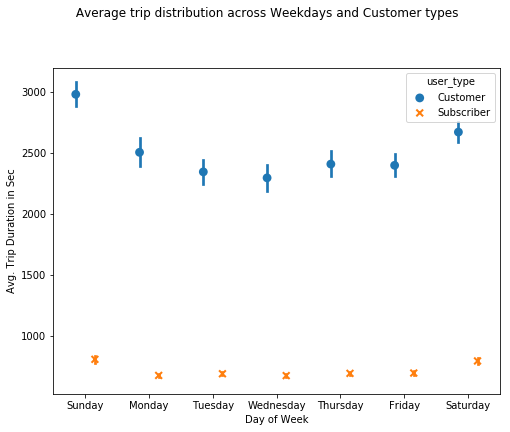

In [30]:
sns.pointplot(data=df, x= 'weekday', y= 'duration_sec', hue='user_type', dodge=0.3,  markers=["o", "x"], linestyles="", order=weekday_order);
plt.suptitle(" Average trip distribution across Weekdays and Customer types  ", y=1.02)
plt.xlabel('Day of Week');
plt.ylabel('Avg. Trip Duration in Sec');

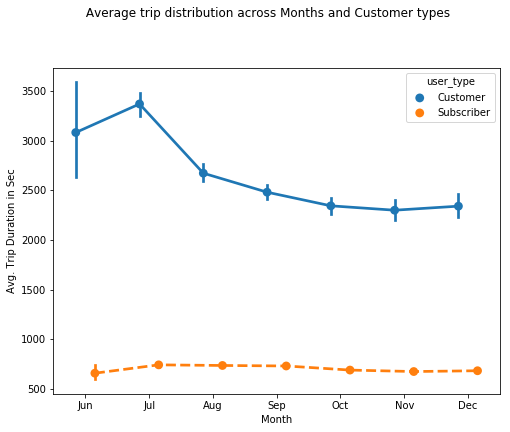

In [31]:
sns.pointplot(data=df, x='month', y='duration_sec', hue='user_type', dodge=0.3, linestyles=["-", "--"], order=month_order);
plt.suptitle(" Average trip distribution across Months and Customer types  ", y=1.02)
plt.xlabel('Month');
plt.ylabel('Avg. Trip Duration in Sec');

It can be seen from the above plot that subscribers ride much shorter/quicker trips compared to customers on each day of the week and also in every month. subscribers usage is almost constant on weekdays. There is rise in usage for both customers and subscribers on weekends. Both subcriber and customer tend to ride for more duration in july. may be that is related to weather of the area.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

I extended my investigation of duration_sec against user_type, weekday, month. I observed that weekday significantly affect the number of rides negetively whereas it affects positively to the duration of ride. I also observed that there are significantly larger number of subscribers than customers. the number of subscriber and customer rides increase significantly in July. The usage of subscribers is almost fixed on weekdays. Maybe they are using for commute.

### Were there any interesting or surprising interactions between features?

One of the most interesting thing I observed that on weekends number of rides are less than working days whereas the duration of ride is more. Though the subscribers are more in number, customers tend to ride for more duration than subscribers.